In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import scipy 
import sklearn
import os


import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, average_precision_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling2D, MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv1D
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD#Stochastic Gradient Descent Optimize
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization


# import livelossplot
# from livelossplot import PlotLossesKeras
# plot_losses = livelossplot.PlotLossesKeras()

#Plotly Libraries
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import chart_studio
from scipy import signal

In [4]:
main_data = pd.read_csv('Main_File_All_Activites.csv')

In [5]:
main_data

,Unnamed: 0,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,label
0,0,-0.109497,-0.130493,-1.009521,-21.827697,2.431869,-17.713546,-45.650100,46.182479,-7.128815,Eating/Drinking
1,1,-0.109985,-0.087036,-1.024170,-18.714904,2.187729,-18.018722,-44.150100,46.632476,-4.578812,Eating/Drinking
2,2,-0.133423,-0.087036,-1.010010,-5.470276,-1.470566,-18.445968,-44.750106,47.532485,-4.428818,Eating/Drinking
3,3,-0.132446,-0.065552,-0.980224,8.808136,-1.592636,-21.741867,-46.250106,46.782485,-4.428818,Eating/Drinking
4,4,-0.172485,-0.096313,-0.989502,22.357940,-20.391464,-23.206710,-47.000106,46.032485,-4.728821,Eating/Drinking
...,...,...,...,...,...,...,...,...,...,...,...
2325999,4781,-0.380493,-0.254639,-0.923584,-31.435012,-73.619842,-152.120590,-56.841903,-12.584382,17.991851,Walking
2326000,4782,-0.297485,-0.410400,-0.989990,-9.584427,-43.834686,-122.701644,-44.991897,-26.984375,24.291854,Walking
2326001,4783,-0.270630,-0.513916,-0.870849,13.544083,15.121460,-66.610336,-31.191909,-38.534378,32.091857,Walking
2326002,4784,-0.372681,-0.456787,-0.781982,11.957169,-25.157928,-67.525863,-31.641906,-38.984375,31.941848,Walking


In [6]:
main_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

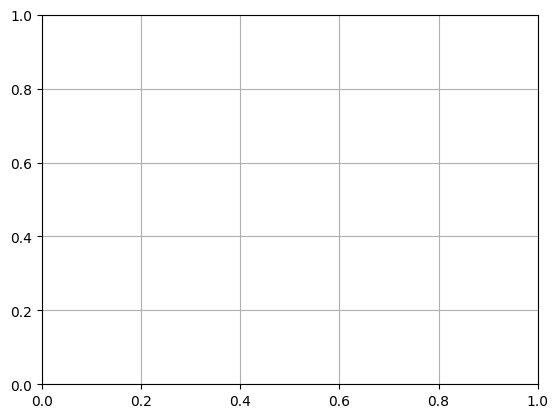

In [7]:
fig = plt.figure()
ax = plt.axes()
plt.grid()
plt.show()

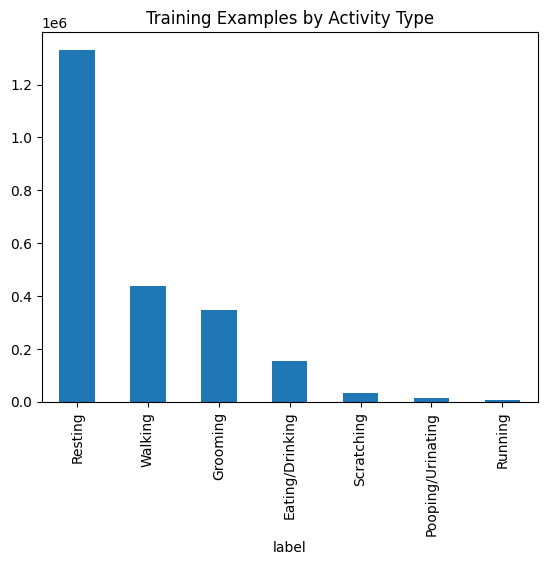

In [8]:
main_data['label'].value_counts().plot(kind='bar',title='Training Examples by Activity Type')
plt.show()

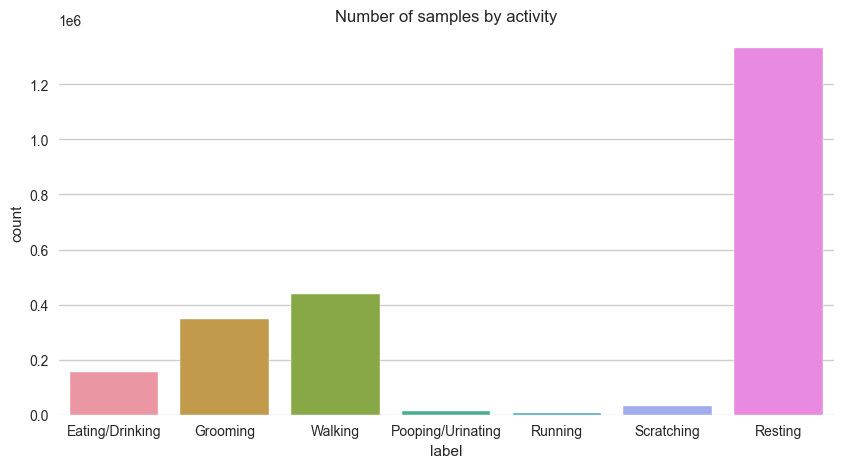

In [9]:
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import chart_studio
from scipy import signal
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = 'label', data = main_data)
plt.title('Number of samples by activity')
plt.show()

In [10]:
main_data['label'].value_counts()

label
Resting              1331811
Walking               438375
Grooming              347286
Eating/Drinking       155008
Scratching             32648
Pooping/Urinating      13663
Running                 7213
Name: count, dtype: int64

In [11]:
main_data.loc[main_data.label == 'Resting', 'label'] = 'No Activity'
main_data.loc[main_data.label == 'Scratching', 'label'] = 'No Activity'
main_data.loc[main_data.label == 'Running', 'label'] = 'No Activity'
main_data.loc[main_data.label == 'Pooping/Urinating', 'label'] = 'No Activity'
# main_data.loc[main_data.label == 'grooming', 'label'] = 'Grooming'
# all_df.loc[all_df.Label == 'Pooping /Urinating', 'Label'] = 'Urinating/Pooping'
# all_df.loc[all_df.Label == 'Urine', 'Label'] = 'Urinating/Pooping'
# all_df.loc[all_df.Label == ' Grooming', 'Label'] = 'Grooming'
# all_df.loc[all_df.Label == ' Vertical exercise', 'Label'] = 'Vertical exercise'

In [12]:
main_data['label'].value_counts()

label
No Activity        1385335
Walking             438375
Grooming            347286
Eating/Drinking     155008
Name: count, dtype: int64

In [13]:
def Label_Num(var):
    if(var=='Walking'):
        return int(0)
    elif(var=='Eating/Drinking'):
        return int(1)
    elif(var=='Grooming'):
        return int(2)
    elif(var=='No Activity'):
        return int(3)

main_data['Label_Numeric']=main_data['label'].apply(Label_Num)

In [14]:
main_data

,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,label,Label_Numeric
0,-0.109497,-0.130493,-1.009521,-21.827697,2.431869,-17.713546,-45.650100,46.182479,-7.128815,Eating/Drinking,1
1,-0.109985,-0.087036,-1.024170,-18.714904,2.187729,-18.018722,-44.150100,46.632476,-4.578812,Eating/Drinking,1
2,-0.133423,-0.087036,-1.010010,-5.470276,-1.470566,-18.445968,-44.750106,47.532485,-4.428818,Eating/Drinking,1
3,-0.132446,-0.065552,-0.980224,8.808136,-1.592636,-21.741867,-46.250106,46.782485,-4.428818,Eating/Drinking,1
4,-0.172485,-0.096313,-0.989502,22.357940,-20.391464,-23.206710,-47.000106,46.032485,-4.728821,Eating/Drinking,1
...,...,...,...,...,...,...,...,...,...,...,...
2325999,-0.380493,-0.254639,-0.923584,-31.435012,-73.619842,-152.120590,-56.841903,-12.584382,17.991851,Walking,0
2326000,-0.297485,-0.410400,-0.989990,-9.584427,-43.834686,-122.701644,-44.991897,-26.984375,24.291854,Walking,0
2326001,-0.270630,-0.513916,-0.870849,13.544083,15.121460,-66.610336,-31.191909,-38.534378,32.091857,Walking,0
2326002,-0.372681,-0.456787,-0.781982,11.957169,-25.157928,-67.525863,-31.641906,-38.984375,31.941848,Walking,0


In [15]:
main_data

,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,label,Label_Numeric
0,-0.109497,-0.130493,-1.009521,-21.827697,2.431869,-17.713546,-45.650100,46.182479,-7.128815,Eating/Drinking,1
1,-0.109985,-0.087036,-1.024170,-18.714904,2.187729,-18.018722,-44.150100,46.632476,-4.578812,Eating/Drinking,1
2,-0.133423,-0.087036,-1.010010,-5.470276,-1.470566,-18.445968,-44.750106,47.532485,-4.428818,Eating/Drinking,1
3,-0.132446,-0.065552,-0.980224,8.808136,-1.592636,-21.741867,-46.250106,46.782485,-4.428818,Eating/Drinking,1
4,-0.172485,-0.096313,-0.989502,22.357940,-20.391464,-23.206710,-47.000106,46.032485,-4.728821,Eating/Drinking,1
...,...,...,...,...,...,...,...,...,...,...,...
2325999,-0.380493,-0.254639,-0.923584,-31.435012,-73.619842,-152.120590,-56.841903,-12.584382,17.991851,Walking,0
2326000,-0.297485,-0.410400,-0.989990,-9.584427,-43.834686,-122.701644,-44.991897,-26.984375,24.291854,Walking,0
2326001,-0.270630,-0.513916,-0.870849,13.544083,15.121460,-66.610336,-31.191909,-38.534378,32.091857,Walking,0
2326002,-0.372681,-0.456787,-0.781982,11.957169,-25.157928,-67.525863,-31.641906,-38.984375,31.941848,Walking,0


In [16]:
# #Filtering

# from scipy.signal import butter, lfilter, freqz

# def butter_lowpass(cutoff, fs, order=5):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     return b, a

# def butter_lowpass_filter(data, cutoff, fs, order=5):
#     b, a = butter_lowpass(cutoff, fs, order=order)
#     y = lfilter(b, a, data)
#     return y

# # Static VAriables For Filter Initialization
# order = 6
# fs = 24       #Sampling Rate --- 50Hz
# cutoff = 1.0  # desired cutoff frequency of the filter, Hz

In [17]:
# # Function Call For Filtering Accelerometer Signals
# main_data['Acc_x']=butter_lowpass_filter(main_data['Acc_x'], cutoff, fs, order=5)
# main_data['Acc_y']=butter_lowpass_filter(main_data['Acc_y'], cutoff, fs, order=5)
# main_data['Acc_z']=butter_lowpass_filter(main_data['Acc_z'], cutoff, fs, order=5)

# main_data['Gyro_x']=butter_lowpass_filter(main_data['Gyro_x'], cutoff, fs, order=5)
# main_data['Gyro_y']=butter_lowpass_filter(main_data['Gyro_y'], cutoff, fs, order=5)
# main_data['Gyro_z']=butter_lowpass_filter(main_data['Gyro_z'], cutoff, fs, order=5)

# main_data['Mag_x']=butter_lowpass_filter(main_data['Mag_x'], cutoff, fs, order=5)
# main_data['Mag_y']=butter_lowpass_filter(main_data['Mag_y'], cutoff, fs, order=5)
# main_data['Mag_z']=butter_lowpass_filter(main_data['Mag_z'], cutoff, fs, order=5)


In [18]:
## Feature Engineering

def mean(x, y, z):
    """Calculates mean"""
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_z = np.mean(z)
    return mean_x, mean_y, mean_z

def std_dev(x, y, z):
    """Calculates standard deviation"""
    std_x = np.std(x)
    std_y = np.std(y)
    std_z = np.std(z)
    return std_x, std_y, std_z  
    
def mad(x, y, z):
    """Calculates median absolute deviation"""
    mad_x = np.median(np.abs(x - np.median(x)))
    mad_y = np.median(np.abs(y - np.median(y)))
    mad_z = np.median(np.abs(z - np.median(z)))
    return mad_x, mad_y, mad_z

def minimum(x, y, z):
    """Calculates minimum"""
    return min(x), min(y), min(z)

def maximum(x, y, z):
    """Calculates maximum"""
    return max(x), max(y), max(z)

def energy_measure(x, y, z):
    """Calculates energy measures"""
    em_x = np.mean(np.square(x))
    em_y = np.mean(np.square(y))
    em_z = np.mean(np.square(z))
    return em_x, em_y, em_z

def inter_quartile_range(x, y, z):
    """Calculates inter-quartile range"""
    iqr_x = np.subtract(*np.percentile(x, [75, 25]))
    iqr_y = np.subtract(*np.percentile(y, [75, 25]))
    iqr_z = np.subtract(*np.percentile(z, [75, 25]))
    return iqr_x, iqr_y, iqr_z

def sma(x, y, z):
    """Calculates signal magnitude area"""   
    abs_x = np.absolute(x)
    abs_y = np.absolute(y)
    abs_z = np.absolute(z)
    return np.mean(abs_x+abs_y+abs_z)

def skewness(x, y, z):
    """Calculates skewness"""
    skew_x=stats.skew(x)
    skew_y=stats.skew(y)
    skew_z=stats.skew(z)
    return skew_x, skew_y, skew_z

def kurt(x, y, z):
    """Calculates kurtosis"""
    kurt_x = stats.kurtosis(x,fisher=False)
    kurt_y = stats.kurtosis(y,fisher=False)
    kurt_z = stats.kurtosis(z,fisher=False)
    return kurt_x, kurt_y, kurt_z

In [19]:
# Rolling Mean
def rolling_mean(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = mean(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

# Rolling Standard Deviation 
def rolling_std(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = std_dev(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

# Rolling Mean Absolute Deviation 
def rolling_mad(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = mad(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

# Rolling Minimum 
def rolling_min(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = minimum(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

# Rolling Maximum
def rolling_max(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = maximum(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

#Rolling Energy MEasure
def rolling_energy_measure(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = energy_measure(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv


#Rolling Inter Quartile Range
def rolling_IQ_Range(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = inter_quartile_range(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv


#Rolling Skewness
def rolling_skew(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = skewness(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

#Rolling Kurtosis
def rolling_kurt(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = kurt(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

In [20]:
%%time
# Accelerometer

main_data['roll_mean_AccX'],main_data['roll_mean_AccY'], main_data['roll_mean_NAccZ']=rolling_mean(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_std_AccX'],main_data['roll_std_AccY'], main_data['roll_std_NAccZ']=rolling_std(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_min_AccX'],main_data['roll_min_NAccY'], main_data['roll_min_NAccZ']=rolling_min(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_max_AccX'],main_data['roll_max_NAccY'], main_data['roll_max_NAccZ']=rolling_max(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_EME_AccX'],main_data['roll_EME_NAccY'], main_data['roll_EME_NAccZ']=rolling_energy_measure(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_IQR_AccX'],main_data['roll_IQR_NAccY'], main_data['roll_IQR_NAccZ']=rolling_IQ_Range(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['Acc-SMA']=sma(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_skew_AccX'],main_data['roll_skew_NAccY'], main_data['roll_skew_NAccZ']=rolling_skew(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])

KeyboardInterrupt: 

In [21]:
%%time
#Gyroscope

main_data['roll_mean_NGyroX'],main_data['roll_mean_NGyroY'], main_data['roll_mean_NGyroZ']=rolling_mean(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_std_NGyroX'],main_data['roll_std_NGyroY'], main_data['roll_std_NGyroZ']=rolling_std(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_mad_NGyroX'],main_data['roll_mad_NGyroY'], main_data['roll_mad_NGyroZ']=rolling_mad(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_min_NGyroX'],main_data['roll_min_NGyroY'], main_data['roll_min_NGyroZ']=rolling_min(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_max_NGyroX'],main_data['roll_max_NGyroY'], main_data['roll_max_NGyroZ']=rolling_max(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_EME_NGyroX'],main_data['roll_EME_NGyroY'], main_data['roll_EME_NGyroZ']=rolling_energy_measure(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_IQR_NGyroX'],main_data['roll_IQR_NGyroY'], main_data['roll_IQR_NGyroZ']=rolling_IQ_Range(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['N-Gyro-SMA']=sma(main_data['Gyro_x'],main_data['Gyro_y'],main_data['Gyro_z'])
main_data['roll_skew_NGyroX'],main_data['roll_skew_NGyroY'], main_data['roll_skew_NGyroZ']=rolling_skew(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])

CPU times: total: 28min 9s
Wall time: 28min 12s


In [22]:
%%time
#Magneto

main_data['roll_mean_TAccX'],main_data['roll_mean_TAccY'], main_data['roll_mean_TAccZ']=rolling_mean(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_std_TAccX'],main_data['roll_std_TAccY'], main_data['roll_std_TAccZ']=rolling_std(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_mad_TAccX'],main_data['roll_mad_TAccY'], main_data['roll_mad_TAccZ']=rolling_mad(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_min_TAccX'],main_data['roll_min_TAccY'], main_data['roll_min_TAccZ']=rolling_min(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_max_TAccX'],main_data['roll_max_TAccY'], main_data['roll_max_TAccZ']=rolling_max(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_EME_TAccX'],main_data['roll_EME_TAccY'], main_data['roll_EME_TAccZ']=rolling_energy_measure(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_IQR_TAccX'],main_data['roll_IQR_TAccY'], main_data['roll_IQR_TAccZ']=rolling_IQ_Range(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['T-Acc-SMA']=sma(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_skew_TAccX'],main_data['roll_skew_TAccY'], main_data['roll_skew_TAccZ']=rolling_skew(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])

CPU times: total: 28min 55s
Wall time: 29min 2s


In [23]:
X = main_data[['Acc_x','Acc_y','Acc_z','Gyro_x','Gyro_y','Gyro_z','Mag_x','Mag_y','Mag_z','roll_mean_AccX','roll_mean_AccY','roll_mean_NAccZ','roll_std_AccX',
'roll_std_AccY','roll_std_NAccZ','roll_min_AccX','roll_min_NAccY','roll_min_NAccZ','roll_max_AccX','roll_max_NAccY',
'roll_max_NAccZ','roll_EME_AccX','roll_EME_NAccY','roll_EME_NAccZ','roll_IQR_AccX','roll_IQR_NAccY','roll_IQR_NAccZ',
'Acc-SMA','roll_skew_AccX','roll_skew_NAccY','roll_skew_NAccZ','roll_mean_NGyroX','roll_mean_NGyroY','roll_mean_NGyroZ',
'roll_std_NGyroX','roll_std_NGyroY','roll_std_NGyroZ','roll_mad_NGyroX','roll_mad_NGyroY','roll_mad_NGyroZ','roll_min_NGyroX',
'roll_min_NGyroY','roll_min_NGyroZ','roll_max_NGyroX','roll_max_NGyroY','roll_max_NGyroZ','roll_EME_NGyroX','roll_EME_NGyroY',
'roll_EME_NGyroZ','roll_IQR_NGyroX','roll_IQR_NGyroY','roll_IQR_NGyroZ','N-Gyro-SMA','roll_skew_NGyroX','roll_skew_NGyroY',
'roll_skew_NGyroZ','roll_mean_TAccX','roll_mean_TAccY','roll_mean_TAccZ','roll_std_TAccX','roll_std_TAccY','roll_std_TAccZ',
'roll_mad_TAccX','roll_mad_TAccY','roll_mad_TAccZ','roll_min_TAccX','roll_min_TAccY','roll_min_TAccZ','roll_max_TAccX',
'roll_max_TAccY','roll_max_TAccZ','roll_EME_TAccX','roll_EME_TAccY','roll_EME_TAccZ','roll_IQR_TAccX','roll_IQR_TAccY',
'roll_IQR_TAccZ','T-Acc-SMA','roll_skew_TAccX','roll_skew_TAccY','roll_skew_TAccZ']]

y = main_data['Label_Numeric']

KeyError: "['roll_max_AccX', 'roll_max_NAccY', 'roll_max_NAccZ', 'roll_EME_AccX', 'roll_EME_NAccY', 'roll_EME_NAccZ', 'roll_IQR_AccX', 'roll_IQR_NAccY', 'roll_IQR_NAccZ', 'Acc-SMA', 'roll_skew_AccX', 'roll_skew_NAccY', 'roll_skew_NAccZ'] not in index"

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_data = pd.DataFrame(data = X, columns =[['Acc_x','Acc_y','Acc_z','Gyro_x','Gyro_y','Gyro_z','Mag_x','Mag_y','Mag_z','roll_mean_AccX','roll_mean_AccY','roll_mean_NAccZ','roll_std_AccX',
'roll_std_AccY','roll_std_NAccZ','roll_min_AccX','roll_min_NAccY','roll_min_NAccZ','roll_max_AccX','roll_max_NAccY',
'roll_max_NAccZ','roll_EME_AccX','roll_EME_NAccY','roll_EME_NAccZ','roll_IQR_AccX','roll_IQR_NAccY','roll_IQR_NAccZ',
'Acc-SMA','roll_skew_AccX','roll_skew_NAccY','roll_skew_NAccZ','roll_mean_NGyroX','roll_mean_NGyroY','roll_mean_NGyroZ',
'roll_std_NGyroX','roll_std_NGyroY','roll_std_NGyroZ','roll_mad_NGyroX','roll_mad_NGyroY','roll_mad_NGyroZ','roll_min_NGyroX',
'roll_min_NGyroY','roll_min_NGyroZ','roll_max_NGyroX','roll_max_NGyroY','roll_max_NGyroZ','roll_EME_NGyroX','roll_EME_NGyroY',
'roll_EME_NGyroZ','roll_IQR_NGyroX','roll_IQR_NGyroY','roll_IQR_NGyroZ','N-Gyro-SMA','roll_skew_NGyroX','roll_skew_NGyroY',
'roll_skew_NGyroZ','roll_mean_TAccX','roll_mean_TAccY','roll_mean_TAccZ','roll_std_TAccX','roll_std_TAccY','roll_std_TAccZ',
'roll_mad_TAccX','roll_mad_TAccY','roll_mad_TAccZ','roll_min_TAccX','roll_min_TAccY','roll_min_TAccZ','roll_max_TAccX',
'roll_max_TAccY','roll_max_TAccZ','roll_EME_TAccX','roll_EME_TAccY','roll_EME_TAccZ','roll_IQR_TAccX','roll_IQR_TAccY',
'roll_IQR_TAccZ','T-Acc-SMA','roll_skew_TAccX','roll_skew_TAccY','roll_skew_TAccZ']])

scaled_data['Label_Numeric'] = y.values
                           
scaled_data.head()

In [ ]:
scaled_data.to_csv('D:/Cat Activity Data/Third V3/Data/final_one_for_class_weights_stnd_data.csv',index=False) 

In [ ]:
df= pd.read_csv('D:/Cat Activity Data/Third V3/Data/final_one_for_class_weights_stnd_data.csv')

In [29]:
df

,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,roll_mean_AccX,...,roll_EME_TAccY,roll_EME_TAccZ,roll_IQR_TAccX,roll_IQR_TAccY,roll_IQR_TAccZ,T-Acc-SMA,roll_skew_TAccX,roll_skew_TAccY,roll_skew_TAccZ,Label_Numeric
0,-0.473638,0.007400,-0.738068,-0.309825,0.047061,-0.333567,-0.968562,1.377728,0.077405,-0.282570,...,-0.933042,-0.768205,-0.471591,-0.488081,-0.496059,-1.0,-2.453222,2.452919,-2.444081,1
1,-0.474747,0.106606,-0.772031,-0.265861,0.042017,-0.339330,-0.934044,1.387581,0.139266,-0.334011,...,-0.723836,-0.766411,7.484677,7.290740,0.326964,-1.0,-0.673053,0.668691,-1.014318,1
2,-0.528008,0.106606,-0.739202,-0.078795,-0.033570,-0.347398,-0.947851,1.407287,0.142905,-0.396414,...,-0.506478,-0.764733,7.592803,7.366536,0.326964,-1.0,0.659991,-0.664230,0.056177,1
3,-0.525787,0.155650,-0.670146,0.122871,-0.036092,-0.409637,-0.982370,1.390866,0.142905,-0.458360,...,-0.295924,-0.763055,-0.201276,-0.387018,-0.469098,-1.0,2.435090,-2.447143,1.129544,1
4,-0.616773,0.085428,-0.691656,0.314246,-0.424510,-0.437298,-0.999629,1.374444,0.135627,-0.539032,...,-0.092068,-0.761141,-0.201276,-0.387018,-0.442134,-1.0,0.001794,0.944528,-2.375609,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325999,-1.089454,-0.276005,-0.538830,-0.445517,-1.524303,-2.871673,-1.226112,0.091028,0.686813,-0.979108,...,-1.086259,-0.717656,-0.201276,2.190055,1.714813,-1.0,0.140709,-0.944297,0.363203,0
2326000,-0.900825,-0.631582,-0.692787,-0.136903,-0.908888,-2.316133,-0.953416,-0.224260,0.839646,-0.956042,...,-1.029076,-0.667716,-0.201276,3.150144,1.310388,-1.0,2.300657,-0.513018,-0.113010,0
2326001,-0.839799,-0.867892,-0.416568,0.189761,0.309251,-1.256921,-0.635846,-0.477147,1.028869,-0.996007,...,-0.900460,-0.580434,1.934207,3.327008,1.094693,-1.0,1.373261,-0.068850,0.265659,0
2326002,-1.071702,-0.737476,-0.210537,0.167347,-0.522993,-1.274209,-0.646201,-0.487000,1.025229,-1.026152,...,-0.762070,-0.498527,4.069688,3.882849,2.011395,-1.0,0.028386,0.424490,-0.061092,0


In [30]:
import scipy.stats as stats

frame_size = 50
hop_size = 20

In [31]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 81

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        N_AccX = df['Acc_x'].values[i: i + frame_size]
        N_AccY = df['Acc_y'].values[i: i + frame_size]
        N_AccZ = df['Acc_z'].values[i: i + frame_size]
        N_GyroX = df['Gyro_x'].values[i: i + frame_size]
        N_GyroY = df['Gyro_y'].values[i: i + frame_size]
        N_GyroZ = df['Gyro_z'].values[i: i + frame_size]
        T_AccX = df['Mag_x'].values[i: i + frame_size]
        T_AccY = df['Mag_y'].values[i: i + frame_size]
        T_AccZ = df['Mag_z'].values[i: i + frame_size]
 
        roll_std_NAccX = df['roll_mean_AccX'].values[i: i + frame_size]
        roll_IQR_TGyroX = df['roll_mean_AccY'].values[i: i + frame_size]
        roll_EME_TGyroZ = df['roll_mean_NAccZ'].values[i: i + frame_size]
        roll_EME_TGyroY = df['roll_std_AccX'].values[i: i + frame_size]
        roll_skew_NGyroZ = df['roll_std_AccY'].values[i: i + frame_size]
        roll_max_NAccX = df['roll_std_NAccZ'].values[i: i + frame_size]
        roll_mad_NGyroZ = df['roll_min_AccX'].values[i: i + frame_size]
        roll_mean_NGyroZ = df['roll_min_NAccY'].values[i: i + frame_size]
        roll_max_NGyroX = df['roll_min_NAccZ'].values[i: i + frame_size]
        roll_mean_NAccY = df['roll_max_AccX'].values[i: i + frame_size]
        roll_mean_NAccX = df['roll_max_NAccY'].values[i: i + frame_size]
        roll_mad_NAccY = df['roll_max_NAccZ'].values[i: i + frame_size]
        roll_EME_TAccX = df['roll_EME_AccX'].values[i: i + frame_size]
        roll_kurt_NAccX = df['roll_EME_NAccY'].values[i: i + frame_size]
        roll_EME_TAccZ = df['roll_EME_NAccZ'].values[i: i + frame_size]
        roll_min_TGyroX = df['roll_IQR_AccX'].values[i: i + frame_size]
        roll_IQR_NAccZ = df['roll_IQR_NAccY'].values[i: i + frame_size]
        roll_skew_NAccZ = df['roll_IQR_NAccZ'].values[i: i + frame_size]
        roll_IQR_TAccX = df['Acc-SMA'].values[i: i + frame_size]
        roll_kurt_NGyroY = df['roll_skew_AccX'].values[i: i + frame_size]
        roll_mean_TAccZ = df['roll_skew_NAccY'].values[i: i + frame_size]
        roll_IQR_TAccZ = df['roll_skew_NAccZ'].values[i: i + frame_size]
        roll_mad_TAccY = df['roll_mean_NGyroX'].values[i: i + frame_size]
        roll_min_NAccY = df['roll_mean_NGyroY'].values[i: i + frame_size]
        roll_mean_TGyroX = df['roll_mean_NGyroZ'].values[i: i + frame_size]
        roll_std_TGyroZ = df['roll_std_NGyroX'].values[i: i + frame_size]
        roll_std_NGyroY = df['roll_std_NGyroY'].values[i: i + frame_size]
        roll_min_NAccX = df['roll_std_NGyroZ'].values[i: i + frame_size]
        roll_mad_TAccX = df['roll_mad_NGyroX'].values[i: i + frame_size]
        roll_IQR_TAccY = df['roll_mad_NGyroY'].values[i: i + frame_size]
        roll_min_TAccZ = df['roll_mad_NGyroZ'].values[i: i + frame_size]
        roll_max_NGyroZ = df['roll_min_NGyroX'].values[i: i + frame_size]
        roll_min_NAccZ = df['roll_min_NGyroY'].values[i: i + frame_size]
        roll_kurt_NGyroZ = df['roll_min_NGyroZ'].values[i: i + frame_size]
        roll_mad_NGyroY = df['roll_max_NGyroX'].values[i: i + frame_size]
        roll_max_NAccY = df['roll_max_NGyroY'].values[i: i + frame_size]
        roll_min_TAccX = df['roll_max_NGyroZ'].values[i: i + frame_size]
        roll_mean_TGyroZ = df['roll_EME_NGyroX'].values[i: i + frame_size]
        roll_mad_TGyroZ = df['roll_EME_NGyroY'].values[i: i + frame_size]
        roll_EME_NGyroZ = df['roll_EME_NGyroZ'].values[i: i + frame_size]
        roll_IQR_NAccX = df['roll_IQR_NGyroX'].values[i: i + frame_size]
        roll_min_TGyroY = df['roll_IQR_NGyroY'].values[i: i + frame_size]
        N_Acc_SMA = df['roll_IQR_NGyroZ'].values[i: i + frame_size]
        roll_EME_TGyroX = df['N-Gyro-SMA'].values[i: i + frame_size]
        roll_mad_NGyroX = df['roll_skew_NGyroX'].values[i: i + frame_size]
        roll_mad_TGyroX = df['roll_skew_NGyroY'].values[i: i + frame_size]
        roll_IQR_TGyroZ = df['roll_skew_NGyroZ'].values[i: i + frame_size]
        roll_max_TGyroY = df['roll_mean_TAccX'].values[i: i + frame_size]
        roll_kurt_NGyroX = df['roll_mean_TAccY'].values[i: i + frame_size]
        roll_min_TGyroZ = df['roll_mean_TAccZ'].values[i: i + frame_size]
        T_Acc_SMA = df['roll_std_TAccX'].values[i: i + frame_size]
        roll_max_NAccZ = df['roll_std_TAccY'].values[i: i + frame_size]
        roll_kurt_NAccY = df['roll_std_TAccZ'].values[i: i + frame_size]
        roll_mad_NAccX = df['roll_mad_TAccX'].values[i: i + frame_size]
        roll_skew_NGyroX = df['roll_mad_TAccY'].values[i: i + frame_size]
        roll_mad_TGyroY = df['roll_mad_TAccZ'].values[i: i + frame_size]
        roll_std_NAccZ = df['roll_min_TAccX'].values[i: i + frame_size]
        roll_std_TAccZ = df['roll_min_TAccY'].values[i: i + frame_size]
        roll_mad_TAccZ = df['roll_min_TAccZ'].values[i: i + frame_size]
        roll_std_TGyroY = df['roll_max_TAccX'].values[i: i + frame_size]
        roll_max_TAccX = df['roll_max_TAccY'].values[i: i + frame_size]
        roll_min_NGyroY = df['roll_max_TAccZ'].values[i: i + frame_size]
        roll_skew_TGyroZ = df['roll_EME_TAccX'].values[i: i + frame_size]
        roll_std_NGyroZ = df['roll_EME_TAccY'].values[i: i + frame_size]
        roll_mean_NGyroX = df['roll_EME_TAccZ'].values[i: i + frame_size]
        roll_IQR_NGyroX = df['roll_IQR_TAccX'].values[i: i + frame_size]
        roll_mean_TAccY = df['roll_IQR_TAccY'].values[i: i + frame_size]
        roll_max_TGyroZ = df['roll_IQR_TAccZ'].values[i: i + frame_size]
        roll_min_NGyroZ = df['T-Acc-SMA'].values[i: i + frame_size]
        roll_EME_NGyroX = df['roll_skew_TAccX'].values[i: i + frame_size]
        roll_skew_TGyroX = df['roll_skew_TAccY'].values[i: i + frame_size]
        roll_std_TGyroX = df['roll_skew_TAccZ'].values[i: i + frame_size]
        
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['Label_Numeric'][i: i + frame_size])[0][0]
        frames.append([N_AccX,N_AccY,N_AccZ,N_GyroX,N_GyroY,N_GyroZ,T_AccX,T_AccY,T_AccZ,roll_std_NAccX,roll_IQR_TGyroX,roll_EME_TGyroZ,roll_EME_TGyroY,roll_skew_NGyroZ, 
                       roll_max_NAccX,roll_mad_NGyroZ,roll_mean_NGyroZ,roll_max_NGyroX,roll_mean_NAccY,
                       roll_mean_NAccX,roll_mad_NAccY,roll_EME_TAccX,roll_kurt_NAccX,roll_EME_TAccZ,
                       roll_min_TGyroX,roll_IQR_NAccZ,roll_skew_NAccZ,roll_IQR_TAccX,roll_kurt_NGyroY,
                       roll_mean_TAccZ,roll_IQR_TAccZ,roll_mad_TAccY,roll_min_NAccY,roll_mean_TGyroX,
                       roll_std_TGyroZ,roll_std_NGyroY,roll_min_NAccX,roll_mad_TAccX,roll_IQR_TAccY,
                       roll_min_TAccZ,roll_max_NGyroZ,roll_min_NAccZ,roll_kurt_NGyroZ,roll_mad_NGyroY,
                       roll_max_NAccY,roll_min_TAccX,roll_mean_TGyroZ,roll_mad_TGyroZ,roll_EME_NGyroZ,
                       roll_IQR_NAccX,roll_min_TGyroY,N_Acc_SMA,roll_EME_TGyroX,roll_mad_NGyroX,
                       roll_mad_TGyroX,roll_IQR_TGyroZ,roll_max_TGyroY,roll_kurt_NGyroX,
                       roll_min_TGyroZ,T_Acc_SMA,roll_max_NAccZ,roll_kurt_NAccY,roll_mad_NAccX,
                       roll_skew_NGyroX,roll_mad_TGyroY,roll_std_NAccZ,roll_std_TAccZ,roll_mad_TAccZ,
                       roll_std_TGyroY,roll_max_TAccX,roll_min_NGyroY,roll_skew_TGyroZ,roll_std_NGyroZ,
                       roll_mean_NGyroX,roll_IQR_NGyroX,roll_mean_TAccY,roll_max_TGyroZ,roll_min_NGyroZ,
                       roll_EME_NGyroX,roll_skew_TGyroX,roll_std_TGyroX])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [32]:
X, y = get_frames(df, frame_size, hop_size)

X.shape, y.shape

((116298, 50, 81), (116298,))

In [33]:
#One Hot Encode our Labels
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
labe = encoder.fit_transform(y)
print(labe.shape)
labe

(116298, 4)


array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, labe, test_size = 0.2, random_state = 0, stratify = labe)

In [35]:
print("Shape of Train Features",X_train.shape)
print("Shape of Train Labels",y_train.shape)

print("Shape of Test Features",X_test.shape)
print("Shape of Test Labels",y_test.shape)

Shape of Train Features (93038, 50, 81)
Shape of Train Labels (93038, 4)
Shape of Test Features (23260, 50, 81)
Shape of Test Labels (23260, 4)


In [36]:
X_train.shape, X_test.shape

((93038, 50, 81), (23260, 50, 81))

In [37]:
X_train[1].shape, X_test[1].shape

((50, 81), (50, 81))

In [38]:
def create_network():
    model = Sequential()
    model.add(Conv1D(filters=96, kernel_size=2, padding='same' ,strides=1, activation='relu', input_shape = X_train[0].shape))
    model.add(Conv1D(filters=96, kernel_size=2, padding='same' ,strides=1, activation='relu'))
    model.add(Conv1D(filters=96, kernel_size=2, padding='same' , strides=1, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=2, padding='same' ,strides=1, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=2, padding='same' ,strides=1, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    
    #stochastic gradient descent
    sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
    #adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [39]:
model = create_network()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 96)            15648     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 96)            18528     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 96)            18528     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 50, 128)           24704     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 50, 128)           32896     
_________________________________________________________________
dropout (Dropout)            (None, 50, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [41]:
class_weight = {0: 1.3264,
            1: 3.7514,
            2: 1.6744,
            3: 0.4366,
               }

In [42]:
import livelossplot
#from livelossplot import PlotLossesKeras
from livelossplot import PlotLossesKerasTF
from livelossplot.tf_keras import PlotLossesCallback
plot_losses = livelossplot.PlotLossesKerasTF()
# plot_losses = livelossplot.PlotLossesKeras()

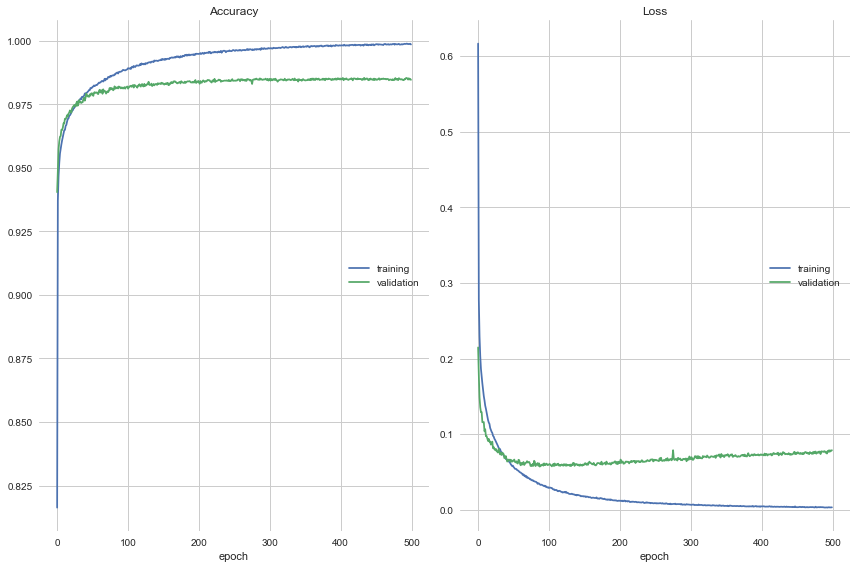

Accuracy
	training         	 (min:    0.816, max:    0.999, cur:    0.999)
	validation       	 (min:    0.940, max:    0.985, cur:    0.985)
Loss
	training         	 (min:    0.003, max:    0.617, cur:    0.003)
	validation       	 (min:    0.057, max:    0.215, cur:    0.079)
93038/93038 [==============================] - 59s 632us/sample - loss: 0.0032 - acc: 0.9985 - val_loss: 0.0787 - val_acc: 0.9846


In [43]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=True, epochs=500,batch_size=32,verbose=1,class_weight=class_weight,callbacks=[plot_losses])

In [44]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

23260/23260 [==============================] - 3s 137us/sample - loss: 0.0787 - acc: 0.9846

acc: 98.46%


In [45]:
model.save('D:/Cat Activity Data/Third V3/Data/CNN_model.h5')

In [26]:
import pickle
from keras import models
from keras.models import load_model

Using TensorFlow backend.


In [27]:
pickle.dump(model, open('1D_CNN_model.pkl', 'wb'))

TypeError: can't pickle _thread.RLock objects

In [46]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [47]:
rounded_predictions = model.predict_classes(X_test)
rounded_predictions[1]

3

In [48]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

3

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[ 4306,    18,    43,    16],
       [   34,  1474,    37,     5],
       [   39,    15,  3396,    23],
       [   43,     6,    79, 13726]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report

# predict 
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
# label
test_label = np.argmax(y_test, axis=1)

print(test_label.shape, pred.shape)
print(test_label[:5], pred[:5])
# (60000,) (60000,)
# [5 0 4 1 9] [5 0 4 1 9]

(23260,) (23260,)
[2 3 3 3 3] [2 3 3 3 3]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

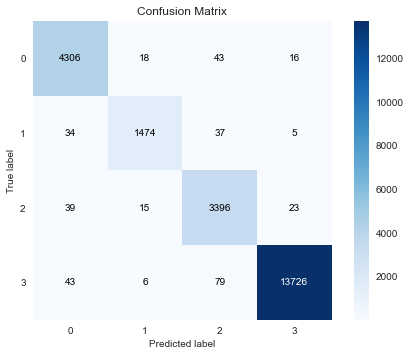

In [51]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(test_label, pred)

In [55]:
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4383
           1       0.97      0.95      0.96      1550
           2       0.96      0.98      0.97      3473
           3       1.00      0.99      0.99     13854

    accuracy                           0.98     23260
   macro avg       0.98      0.98      0.98     23260
weighted avg       0.98      0.98      0.98     23260



In [56]:
import itertools
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Normalized confusion matrix


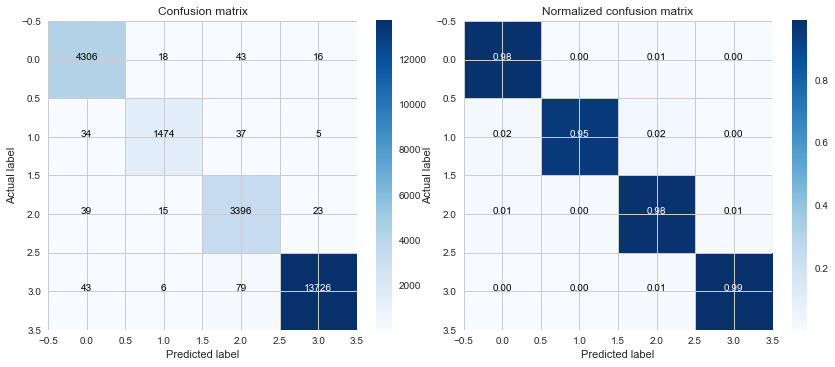

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, pred)
np.set_printoptions(precision=2)

from matplotlib import gridspec
fig = plt.figure(figsize=(12, 5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

#index = ['neutral','happy','sad','neutral1','happy1','sad1']  
##cm_df = pd.DataFrame(cm,columns,index)                      
#plt.figure(figsize=(10,6))  
#sns.heatmap(cm_df, annot=True)

## Plot non-normalized confusion matrix
plt.subplot(gs[0])
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(gs[1])
plot_confusion_matrix(cnf_matrix, normalize=True,title='Normalized confusion matrix')

plt.show()
fig.savefig('Confusion Matrix.png', bbox_inches="tight", dpi=300)

# Testing

In [74]:
main_data = pd.read_csv('D:/Cat Activity Data/Second V2\Data/Test data/New folder/2021-12-14 08_19_33.csv')

In [75]:
main_data

,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,label
0,0.003418,-0.107910,-0.751465,-67.050933,-5.615234,-49.982070,-61.279006,-27.279205,-7.977844,Walking
1,-0.350098,0.383789,-1.289062,-206.699371,-147.399902,-86.297988,-60.079010,-28.179199,-8.727845,Walking
2,-0.034180,0.006348,-1.140136,-90.793609,-85.388183,-110.467910,-58.729003,-27.879211,-10.377839,Walking
3,-0.078613,0.184570,-1.060058,30.296325,-25.268554,-90.082168,-57.829010,-34.479202,-6.177841,Walking
4,-0.060547,0.421875,-1.071777,-28.537750,37.471771,-41.742324,-56.479003,-35.829208,-5.577835,Walking
...,...,...,...,...,...,...,...,...,...,...
402215,-0.215698,0.169434,-0.965210,-0.141144,-0.389099,0.024796,-46.787307,55.643020,-43.104690,No Activity
402216,-0.216186,0.175781,-0.959839,-0.202179,-0.205994,0.207901,-46.487319,54.893020,-43.104690,No Activity
402217,-0.208862,0.180176,-0.968628,-0.141144,-0.328064,0.024796,-46.337310,56.243026,-42.204696,No Activity
402218,-0.221069,0.184082,-0.966675,0.343323,0.339508,0.329971,-46.037307,55.193023,-42.654693,No Activity


In [76]:
main_data['label'].value_counts()

No Activity        343348
Grooming            38800
Eating/Drinking     17384
Walking              2688
Name: label, dtype: int64

In [77]:
def Label_Num(var):
    if(var=='Walking'):
        return int(0)
    elif(var=='Eating/Drinking'):
        return int(1)
    elif(var=='Grooming'):
        return int(2)
    elif(var=='No Activity'):
        return int(3)

main_data['Label_Numeric']=main_data['label'].apply(Label_Num)

In [78]:
main_data

,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,label,Label_Numeric
0,0.003418,-0.107910,-0.751465,-67.050933,-5.615234,-49.982070,-61.279006,-27.279205,-7.977844,Walking,0
1,-0.350098,0.383789,-1.289062,-206.699371,-147.399902,-86.297988,-60.079010,-28.179199,-8.727845,Walking,0
2,-0.034180,0.006348,-1.140136,-90.793609,-85.388183,-110.467910,-58.729003,-27.879211,-10.377839,Walking,0
3,-0.078613,0.184570,-1.060058,30.296325,-25.268554,-90.082168,-57.829010,-34.479202,-6.177841,Walking,0
4,-0.060547,0.421875,-1.071777,-28.537750,37.471771,-41.742324,-56.479003,-35.829208,-5.577835,Walking,0
...,...,...,...,...,...,...,...,...,...,...,...
402215,-0.215698,0.169434,-0.965210,-0.141144,-0.389099,0.024796,-46.787307,55.643020,-43.104690,No Activity,3
402216,-0.216186,0.175781,-0.959839,-0.202179,-0.205994,0.207901,-46.487319,54.893020,-43.104690,No Activity,3
402217,-0.208862,0.180176,-0.968628,-0.141144,-0.328064,0.024796,-46.337310,56.243026,-42.204696,No Activity,3
402218,-0.221069,0.184082,-0.966675,0.343323,0.339508,0.329971,-46.037307,55.193023,-42.654693,No Activity,3


In [79]:
def mean(x, y, z):
    """Calculates mean"""
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_z = np.mean(z)
    return mean_x, mean_y, mean_z

def std_dev(x, y, z):
    """Calculates standard deviation"""
    std_x = np.std(x)
    std_y = np.std(y)
    std_z = np.std(z)
    return std_x, std_y, std_z  
    
def mad(x, y, z):
    """Calculates median absolute deviation"""
    mad_x = np.median(np.abs(x - np.median(x)))
    mad_y = np.median(np.abs(y - np.median(y)))
    mad_z = np.median(np.abs(z - np.median(z)))
    return mad_x, mad_y, mad_z

def minimum(x, y, z):
    """Calculates minimum"""
    return min(x), min(y), min(z)

def maximum(x, y, z):
    """Calculates maximum"""
    return max(x), max(y), max(z)

def energy_measure(x, y, z):
    """Calculates energy measures"""
    em_x = np.mean(np.square(x))
    em_y = np.mean(np.square(y))
    em_z = np.mean(np.square(z))
    return em_x, em_y, em_z

def inter_quartile_range(x, y, z):
    """Calculates inter-quartile range"""
    iqr_x = np.subtract(*np.percentile(x, [75, 25]))
    iqr_y = np.subtract(*np.percentile(y, [75, 25]))
    iqr_z = np.subtract(*np.percentile(z, [75, 25]))
    return iqr_x, iqr_y, iqr_z

def sma(x, y, z):
    """Calculates signal magnitude area"""   
    abs_x = np.absolute(x)
    abs_y = np.absolute(y)
    abs_z = np.absolute(z)
    return np.mean(abs_x+abs_y+abs_z)

def skewness(x, y, z):
    """Calculates skewness"""
    skew_x=stats.skew(x)
    skew_y=stats.skew(y)
    skew_z=stats.skew(z)
    return skew_x, skew_y, skew_z

def kurt(x, y, z):
    """Calculates kurtosis"""
    kurt_x = stats.kurtosis(x,fisher=False)
    kurt_y = stats.kurtosis(y,fisher=False)
    kurt_z = stats.kurtosis(z,fisher=False)
    return kurt_x, kurt_y, kurt_z

In [80]:
# Rolling Mean
def rolling_mean(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = mean(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

# Rolling Standard Deviation 
def rolling_std(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = std_dev(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

# Rolling Mean Absolute Deviation 
def rolling_mad(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = mad(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

# Rolling Minimum 
def rolling_min(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = minimum(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

# Rolling Maximum
def rolling_max(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = maximum(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

#Rolling Energy MEasure
def rolling_energy_measure(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = energy_measure(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv


#Rolling Inter Quartile Range
def rolling_IQ_Range(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = inter_quartile_range(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv


#Rolling Skewness
def rolling_skew(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = skewness(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

#Rolling Kurtosis
def rolling_kurt(x, y, z, window=5):
    zeros= np.repeat(0, window-1, axis=0)    #Zeroes is The Number of zeroes To Be Added
    
    x_list=np.concatenate([zeros,x])    #Concatenated List With Zeroes in the Begining X
    y_list=np.concatenate([zeros,y])    #Concatenated List With Zeroes in the Begining Y
    z_list=np.concatenate([zeros,z])    #Concatenated List With Zeroes in the Begining Z
    
    x_conv=[]
    y_conv=[]
    z_conv=[]
    
    for i in range(len(x)):
        x_net=x_list[i:i+window]
        y_net=y_list[i:i+window]
        z_net=z_list[i:i+window]
        
        x_val, y_val, z_val = kurt(x_net,y_net,z_net)
        
        x_conv.append(x_val)
        y_conv.append(y_val)
        z_conv.append(z_val)
    
    return x_conv, y_conv, z_conv

In [81]:
%%time
#Neck Accelerometer

main_data['roll_mean_AccX'],main_data['roll_mean_AccY'], main_data['roll_mean_NAccZ']=rolling_mean(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_std_AccX'],main_data['roll_std_AccY'], main_data['roll_std_NAccZ']=rolling_std(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_min_AccX'],main_data['roll_min_NAccY'], main_data['roll_min_NAccZ']=rolling_min(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_max_AccX'],main_data['roll_max_NAccY'], main_data['roll_max_NAccZ']=rolling_max(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_EME_AccX'],main_data['roll_EME_NAccY'], main_data['roll_EME_NAccZ']=rolling_energy_measure(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_IQR_AccX'],main_data['roll_IQR_NAccY'], main_data['roll_IQR_NAccZ']=rolling_IQ_Range(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['Acc-SMA']=sma(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])
main_data['roll_skew_AccX'],main_data['roll_skew_NAccY'], main_data['roll_skew_NAccZ']=rolling_skew(main_data['Acc_x'],main_data['Acc_y'],main_data['Acc_z'])

Wall time: 6min 13s


In [82]:
%%time
#Gyroscope

main_data['roll_mean_NGyroX'],main_data['roll_mean_NGyroY'], main_data['roll_mean_NGyroZ']=rolling_mean(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_std_NGyroX'],main_data['roll_std_NGyroY'], main_data['roll_std_NGyroZ']=rolling_std(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_mad_NGyroX'],main_data['roll_mad_NGyroY'], main_data['roll_mad_NGyroZ']=rolling_mad(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_min_NGyroX'],main_data['roll_min_NGyroY'], main_data['roll_min_NGyroZ']=rolling_min(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_max_NGyroX'],main_data['roll_max_NGyroY'], main_data['roll_max_NGyroZ']=rolling_max(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_EME_NGyroX'],main_data['roll_EME_NGyroY'], main_data['roll_EME_NGyroZ']=rolling_energy_measure(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['roll_IQR_NGyroX'],main_data['roll_IQR_NGyroY'], main_data['roll_IQR_NGyroZ']=rolling_IQ_Range(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])
main_data['N-Gyro-SMA']=sma(main_data['Gyro_x'],main_data['Gyro_y'],main_data['Gyro_z'])
main_data['roll_skew_NGyroX'],main_data['roll_skew_NGyroY'], main_data['roll_skew_NGyroZ']=rolling_skew(main_data['Gyro_x'],main_data['Gyro_y'],main_data ['Gyro_z'])

Wall time: 7min 31s


In [83]:
%%time
#Magneto

main_data['roll_mean_TAccX'],main_data['roll_mean_TAccY'], main_data['roll_mean_TAccZ']=rolling_mean(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_std_TAccX'],main_data['roll_std_TAccY'], main_data['roll_std_TAccZ']=rolling_std(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_mad_TAccX'],main_data['roll_mad_TAccY'], main_data['roll_mad_TAccZ']=rolling_mad(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_min_TAccX'],main_data['roll_min_TAccY'], main_data['roll_min_TAccZ']=rolling_min(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_max_TAccX'],main_data['roll_max_TAccY'], main_data['roll_max_TAccZ']=rolling_max(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_EME_TAccX'],main_data['roll_EME_TAccY'], main_data['roll_EME_TAccZ']=rolling_energy_measure(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_IQR_TAccX'],main_data['roll_IQR_TAccY'], main_data['roll_IQR_TAccZ']=rolling_IQ_Range(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['T-Acc-SMA']=sma(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])
main_data['roll_skew_TAccX'],main_data['roll_skew_TAccY'], main_data['roll_skew_TAccZ']=rolling_skew(main_data['Mag_x'],main_data['Mag_y'],main_data['Mag_z'])

Wall time: 7min 39s


In [84]:
main_data

,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,label,...,roll_EME_TAccX,roll_EME_TAccY,roll_EME_TAccZ,roll_IQR_TAccX,roll_IQR_TAccY,roll_IQR_TAccZ,T-Acc-SMA,roll_skew_TAccX,roll_skew_TAccY,roll_skew_TAccZ
0,0.003418,-0.107910,-0.751465,-67.050933,-5.615234,-49.982070,-61.279006,-27.279205,-7.977844,Walking,...,751.023315,148.831005,12.729199,0.000000,0.000000,0.000000,121.245195,-1.500000,-1.500000,-1.500000
1,-0.350098,0.383789,-1.289062,-206.699371,-147.399902,-86.297988,-60.079010,-28.179199,-8.727845,Walking,...,1472.920804,307.644456,27.964255,60.079010,27.279205,7.977844,121.245195,-0.408747,-0.409591,-0.418481
2,-0.034180,0.006348,-1.140136,-90.793609,-85.388183,-110.467910,-58.729003,-27.879211,-10.377839,Walking,...,2162.739962,463.094538,49.504163,60.079010,27.879211,8.727845,121.245195,0.405948,0.406865,0.315105
3,-0.078613,0.184570,-1.060058,30.296325,-25.268554,-90.082168,-57.829010,-34.479202,-6.177841,Walking,...,2831.578842,700.857612,57.137307,2.250000,0.899994,2.550004,121.245195,1.490891,1.314760,1.001129
4,-0.060547,0.421875,-1.071777,-28.537750,37.471771,-41.742324,-56.479003,-35.829208,-5.577835,Walking,...,3469.554398,957.604041,63.359756,2.250000,6.599991,2.550004,121.245195,-0.023983,-0.430298,-0.158130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402215,-0.215698,0.169434,-0.965210,-0.141144,-0.389099,0.024796,-46.787307,55.643020,-43.104690,No Activity,...,2084.051362,3119.934983,1845.204652,0.300003,0.899994,0.149994,121.245195,-1.001333,0.524005,1.170152
402216,-0.216186,0.175781,-0.959839,-0.202179,-0.205994,0.207901,-46.487319,54.893020,-43.104690,No Activity,...,2106.077492,3113.329754,1845.204652,0.900009,0.899994,0.149994,121.245195,-0.114113,0.265649,1.170152
402217,-0.208862,0.180176,-0.968628,-0.141144,-0.328064,0.024796,-46.337310,56.243026,-42.204696,No Activity,...,2119.866185,3133.415111,1827.258128,0.900009,0.600006,0.750000,121.245195,0.499224,-0.415846,0.395557
402218,-0.221069,0.184082,-0.966675,0.343323,0.339508,0.329971,-46.037307,55.193023,-42.654693,No Activity,...,2128.112346,3110.013474,1822.121513,0.450012,1.050003,0.750000,121.245195,0.959445,0.298173,-0.006281


In [85]:
X = main_data[['Acc_x','Acc_y','Acc_z','Gyro_x','Gyro_y','Gyro_z','Mag_x','Mag_y','Mag_z','roll_mean_AccX','roll_mean_AccY','roll_mean_NAccZ','roll_std_AccX',
'roll_std_AccY','roll_std_NAccZ','roll_min_AccX','roll_min_NAccY','roll_min_NAccZ','roll_max_AccX','roll_max_NAccY',
'roll_max_NAccZ','roll_EME_AccX','roll_EME_NAccY','roll_EME_NAccZ','roll_IQR_AccX','roll_IQR_NAccY','roll_IQR_NAccZ',
'Acc-SMA','roll_skew_AccX','roll_skew_NAccY','roll_skew_NAccZ','roll_mean_NGyroX','roll_mean_NGyroY','roll_mean_NGyroZ',
'roll_std_NGyroX','roll_std_NGyroY','roll_std_NGyroZ','roll_mad_NGyroX','roll_mad_NGyroY','roll_mad_NGyroZ','roll_min_NGyroX',
'roll_min_NGyroY','roll_min_NGyroZ','roll_max_NGyroX','roll_max_NGyroY','roll_max_NGyroZ','roll_EME_NGyroX','roll_EME_NGyroY',
'roll_EME_NGyroZ','roll_IQR_NGyroX','roll_IQR_NGyroY','roll_IQR_NGyroZ','N-Gyro-SMA','roll_skew_NGyroX','roll_skew_NGyroY',
'roll_skew_NGyroZ','roll_mean_TAccX','roll_mean_TAccY','roll_mean_TAccZ','roll_std_TAccX','roll_std_TAccY','roll_std_TAccZ',
'roll_mad_TAccX','roll_mad_TAccY','roll_mad_TAccZ','roll_min_TAccX','roll_min_TAccY','roll_min_TAccZ','roll_max_TAccX',
'roll_max_TAccY','roll_max_TAccZ','roll_EME_TAccX','roll_EME_TAccY','roll_EME_TAccZ','roll_IQR_TAccX','roll_IQR_TAccY',
'roll_IQR_TAccZ','T-Acc-SMA','roll_skew_TAccX','roll_skew_TAccY','roll_skew_TAccZ']]

y = main_data['Label_Numeric']

In [86]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_data = pd.DataFrame(data = X, columns =[['Acc_x','Acc_y','Acc_z','Gyro_x','Gyro_y','Gyro_z','Mag_x','Mag_y','Mag_z','roll_mean_AccX','roll_mean_AccY','roll_mean_NAccZ','roll_std_AccX',
'roll_std_AccY','roll_std_NAccZ','roll_min_AccX','roll_min_NAccY','roll_min_NAccZ','roll_max_AccX','roll_max_NAccY',
'roll_max_NAccZ','roll_EME_AccX','roll_EME_NAccY','roll_EME_NAccZ','roll_IQR_AccX','roll_IQR_NAccY','roll_IQR_NAccZ',
'Acc-SMA','roll_skew_AccX','roll_skew_NAccY','roll_skew_NAccZ','roll_mean_NGyroX','roll_mean_NGyroY','roll_mean_NGyroZ',
'roll_std_NGyroX','roll_std_NGyroY','roll_std_NGyroZ','roll_mad_NGyroX','roll_mad_NGyroY','roll_mad_NGyroZ','roll_min_NGyroX',
'roll_min_NGyroY','roll_min_NGyroZ','roll_max_NGyroX','roll_max_NGyroY','roll_max_NGyroZ','roll_EME_NGyroX','roll_EME_NGyroY',
'roll_EME_NGyroZ','roll_IQR_NGyroX','roll_IQR_NGyroY','roll_IQR_NGyroZ','N-Gyro-SMA','roll_skew_NGyroX','roll_skew_NGyroY',
'roll_skew_NGyroZ','roll_mean_TAccX','roll_mean_TAccY','roll_mean_TAccZ','roll_std_TAccX','roll_std_TAccY','roll_std_TAccZ',
'roll_mad_TAccX','roll_mad_TAccY','roll_mad_TAccZ','roll_min_TAccX','roll_min_TAccY','roll_min_TAccZ','roll_max_TAccX',
'roll_max_TAccY','roll_max_TAccZ','roll_EME_TAccX','roll_EME_TAccY','roll_EME_TAccZ','roll_IQR_TAccX','roll_IQR_TAccY',
'roll_IQR_TAccZ','T-Acc-SMA','roll_skew_TAccX','roll_skew_TAccY','roll_skew_TAccZ']])

scaled_data['Label_Numeric'] = y.values
                           
scaled_data.head()

,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,roll_mean_AccX,...,roll_EME_TAccY,roll_EME_TAccZ,roll_IQR_TAccX,roll_IQR_TAccY,roll_IQR_TAccZ,T-Acc-SMA,roll_skew_TAccX,roll_skew_TAccY,roll_skew_TAccZ,Label_Numeric
0,-0.044900,0.701076,-0.209632,-3.550506,-0.241660,-3.127581,-1.251499,-0.285606,0.607631,-0.052020,...,-1.194775,-1.046122,-0.657745,-0.653491,-0.696441,0.0,-2.426120,-2.447503,-2.422900,0
1,-0.913293,2.020784,-1.976941,-10.942403,-6.295110,-5.398771,-1.224257,-0.302865,0.583012,-0.225352,...,-1.125113,-1.036265,37.092432,16.639668,4.763884,0.0,-0.657088,-0.674009,-0.675720,0
2,-0.137258,1.007741,-1.487358,-4.807258,-3.647540,-6.910353,-1.193611,-0.297112,0.528850,-0.242275,...,-1.056926,-1.022330,37.092432,17.020031,5.277212,0.0,0.663617,0.653915,0.509377,0
3,-0.246405,1.486085,-1.224108,1.602296,-1.080752,-5.635433,-1.173179,-0.423678,0.666716,-0.281196,...,-0.952633,-1.017392,0.756025,-0.082956,1.048874,0.0,2.422420,2.130560,1.617639,0
4,-0.202027,2.123005,-1.262633,-1.511920,1.597926,-2.612269,-1.142533,-0.449567,0.686412,-0.311172,...,-0.840014,-1.013366,0.756025,3.530454,1.048874,0.0,-0.033345,-0.707688,-0.255128,0


In [87]:
scaled_data.to_csv('D:/Cat Activity Data/Third V3/Code/Test_data_1.csv',index=False) 

In [180]:
df = pd.read_csv('D:/Cat Activity Data/Third V3/Code/Test_data_11.csv')

In [181]:
df.shape

(402220, 82)

In [182]:
df

,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,roll_mean_AccX,...,roll_EME_TAccY,roll_EME_TAccZ,roll_IQR_TAccX,roll_IQR_TAccY,roll_IQR_TAccZ,T-Acc-SMA,roll_skew_TAccX,roll_skew_TAccY,roll_skew_TAccZ,Label_Numeric
0,-0.044900,0.701076,-0.209632,-3.550506,-0.241660,-3.127581,-1.251499,-0.285606,0.607631,-0.052020,...,-1.194775,-1.046122,-0.657745,-0.653491,-0.696441,0.0,-2.426120,-2.447503,-2.422900,0
1,-0.913293,2.020784,-1.976941,-10.942403,-6.295110,-5.398771,-1.224257,-0.302865,0.583012,-0.225352,...,-1.125113,-1.036265,37.092432,16.639668,4.763884,0.0,-0.657088,-0.674009,-0.675720,0
2,-0.137258,1.007741,-1.487358,-4.807258,-3.647540,-6.910353,-1.193611,-0.297112,0.528850,-0.242275,...,-1.056926,-1.022330,37.092432,17.020031,5.277212,0.0,0.663617,0.653915,0.509377,0
3,-0.246405,1.486085,-1.224108,1.602296,-1.080752,-5.635433,-1.173179,-0.423678,0.666716,-0.281196,...,-0.952633,-1.017392,0.756025,-0.082956,1.048874,0.0,2.422420,2.130560,1.617639,0
4,-0.202027,2.123005,-1.262633,-1.511920,1.597926,-2.612269,-1.142533,-0.449567,0.686412,-0.311172,...,-0.840014,-1.013366,0.756025,3.530454,1.048874,0.0,-0.033345,-0.707688,-0.255128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402215,-0.583147,1.445460,-0.912302,-0.008825,-0.018532,-0.000162,-0.922518,1.304576,-0.545421,-0.591537,...,0.108474,0.139408,-0.469241,-0.082956,-0.593780,0.0,-1.617730,0.844437,1.890695,3
402216,-0.584346,1.462495,-0.894645,-0.012056,-0.010714,0.011289,-0.915708,1.290194,-0.545421,-0.587669,...,0.105576,0.139408,-0.092232,-0.082956,-0.593780,0.0,-0.179456,0.424235,1.890695,3
402217,-0.566355,1.474291,-0.923538,-0.008825,-0.015926,-0.000162,-0.912303,1.316082,-0.515878,-0.584526,...,0.114387,0.127798,-0.092232,-0.273128,-0.183114,0.0,0.814827,-0.684182,0.639346,3
402218,-0.596341,1.484775,-0.917118,0.016819,0.012576,0.018924,-0.905492,1.295947,-0.530649,-0.585252,...,0.104122,0.124475,-0.374984,0.012140,-0.183114,0.0,1.560892,0.477134,-0.009817,3


In [183]:
import scipy.stats as stats

frame_size = 50
hop_size = 20

In [184]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 81

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        N_AccX = df['Acc_x'].values[i: i + frame_size]
        N_AccY = df['Acc_y'].values[i: i + frame_size]
        N_AccZ = df['Acc_z'].values[i: i + frame_size]
        N_GyroX = df['Gyro_x'].values[i: i + frame_size]
        N_GyroY = df['Gyro_y'].values[i: i + frame_size]
        N_GyroZ = df['Gyro_z'].values[i: i + frame_size]
        T_AccX = df['Mag_x'].values[i: i + frame_size]
        T_AccY = df['Mag_y'].values[i: i + frame_size]
        T_AccZ = df['Mag_z'].values[i: i + frame_size]
 
        roll_std_NAccX = df['roll_mean_AccX'].values[i: i + frame_size]
        roll_IQR_TGyroX = df['roll_mean_AccY'].values[i: i + frame_size]
        roll_EME_TGyroZ = df['roll_mean_NAccZ'].values[i: i + frame_size]
        roll_EME_TGyroY = df['roll_std_AccX'].values[i: i + frame_size]
        roll_skew_NGyroZ = df['roll_std_AccY'].values[i: i + frame_size]
        roll_max_NAccX = df['roll_std_NAccZ'].values[i: i + frame_size]
        roll_mad_NGyroZ = df['roll_min_AccX'].values[i: i + frame_size]
        roll_mean_NGyroZ = df['roll_min_NAccY'].values[i: i + frame_size]
        roll_max_NGyroX = df['roll_min_NAccZ'].values[i: i + frame_size]
        roll_mean_NAccY = df['roll_max_AccX'].values[i: i + frame_size]
        roll_mean_NAccX = df['roll_max_NAccY'].values[i: i + frame_size]
        roll_mad_NAccY = df['roll_max_NAccZ'].values[i: i + frame_size]
        roll_EME_TAccX = df['roll_EME_AccX'].values[i: i + frame_size]
        roll_kurt_NAccX = df['roll_EME_NAccY'].values[i: i + frame_size]
        roll_EME_TAccZ = df['roll_EME_NAccZ'].values[i: i + frame_size]
        roll_min_TGyroX = df['roll_IQR_AccX'].values[i: i + frame_size]
        roll_IQR_NAccZ = df['roll_IQR_NAccY'].values[i: i + frame_size]
        roll_skew_NAccZ = df['roll_IQR_NAccZ'].values[i: i + frame_size]
        roll_IQR_TAccX = df['Acc-SMA'].values[i: i + frame_size]
        roll_kurt_NGyroY = df['roll_skew_AccX'].values[i: i + frame_size]
        roll_mean_TAccZ = df['roll_skew_NAccY'].values[i: i + frame_size]
        roll_IQR_TAccZ = df['roll_skew_NAccZ'].values[i: i + frame_size]
        roll_mad_TAccY = df['roll_mean_NGyroX'].values[i: i + frame_size]
        roll_min_NAccY = df['roll_mean_NGyroY'].values[i: i + frame_size]
        roll_mean_TGyroX = df['roll_mean_NGyroZ'].values[i: i + frame_size]
        roll_std_TGyroZ = df['roll_std_NGyroX'].values[i: i + frame_size]
        roll_std_NGyroY = df['roll_std_NGyroY'].values[i: i + frame_size]
        roll_min_NAccX = df['roll_std_NGyroZ'].values[i: i + frame_size]
        roll_mad_TAccX = df['roll_mad_NGyroX'].values[i: i + frame_size]
        roll_IQR_TAccY = df['roll_mad_NGyroY'].values[i: i + frame_size]
        roll_min_TAccZ = df['roll_mad_NGyroZ'].values[i: i + frame_size]
        roll_max_NGyroZ = df['roll_min_NGyroX'].values[i: i + frame_size]
        roll_min_NAccZ = df['roll_min_NGyroY'].values[i: i + frame_size]
        roll_kurt_NGyroZ = df['roll_min_NGyroZ'].values[i: i + frame_size]
        roll_mad_NGyroY = df['roll_max_NGyroX'].values[i: i + frame_size]
        roll_max_NAccY = df['roll_max_NGyroY'].values[i: i + frame_size]
        roll_min_TAccX = df['roll_max_NGyroZ'].values[i: i + frame_size]
        roll_mean_TGyroZ = df['roll_EME_NGyroX'].values[i: i + frame_size]
        roll_mad_TGyroZ = df['roll_EME_NGyroY'].values[i: i + frame_size]
        roll_EME_NGyroZ = df['roll_EME_NGyroZ'].values[i: i + frame_size]
        roll_IQR_NAccX = df['roll_IQR_NGyroX'].values[i: i + frame_size]
        roll_min_TGyroY = df['roll_IQR_NGyroY'].values[i: i + frame_size]
        N_Acc_SMA = df['roll_IQR_NGyroZ'].values[i: i + frame_size]
        roll_EME_TGyroX = df['N-Gyro-SMA'].values[i: i + frame_size]
        roll_mad_NGyroX = df['roll_skew_NGyroX'].values[i: i + frame_size]
        roll_mad_TGyroX = df['roll_skew_NGyroY'].values[i: i + frame_size]
        roll_IQR_TGyroZ = df['roll_skew_NGyroZ'].values[i: i + frame_size]
        roll_max_TGyroY = df['roll_mean_TAccX'].values[i: i + frame_size]
        roll_kurt_NGyroX = df['roll_mean_TAccY'].values[i: i + frame_size]
        roll_min_TGyroZ = df['roll_mean_TAccZ'].values[i: i + frame_size]
        T_Acc_SMA = df['roll_std_TAccX'].values[i: i + frame_size]
        roll_max_NAccZ = df['roll_std_TAccY'].values[i: i + frame_size]
        roll_kurt_NAccY = df['roll_std_TAccZ'].values[i: i + frame_size]
        roll_mad_NAccX = df['roll_mad_TAccX'].values[i: i + frame_size]
        roll_skew_NGyroX = df['roll_mad_TAccY'].values[i: i + frame_size]
        roll_mad_TGyroY = df['roll_mad_TAccZ'].values[i: i + frame_size]
        roll_std_NAccZ = df['roll_min_TAccX'].values[i: i + frame_size]
        roll_std_TAccZ = df['roll_min_TAccY'].values[i: i + frame_size]
        roll_mad_TAccZ = df['roll_min_TAccZ'].values[i: i + frame_size]
        roll_std_TGyroY = df['roll_max_TAccX'].values[i: i + frame_size]
        roll_max_TAccX = df['roll_max_TAccY'].values[i: i + frame_size]
        roll_min_NGyroY = df['roll_max_TAccZ'].values[i: i + frame_size]
        roll_skew_TGyroZ = df['roll_EME_TAccX'].values[i: i + frame_size]
        roll_std_NGyroZ = df['roll_EME_TAccY'].values[i: i + frame_size]
        roll_mean_NGyroX = df['roll_EME_TAccZ'].values[i: i + frame_size]
        roll_IQR_NGyroX = df['roll_IQR_TAccX'].values[i: i + frame_size]
        roll_mean_TAccY = df['roll_IQR_TAccY'].values[i: i + frame_size]
        roll_max_TGyroZ = df['roll_IQR_TAccZ'].values[i: i + frame_size]
        roll_min_NGyroZ = df['T-Acc-SMA'].values[i: i + frame_size]
        roll_EME_NGyroX = df['roll_skew_TAccX'].values[i: i + frame_size]
        roll_skew_TGyroX = df['roll_skew_TAccY'].values[i: i + frame_size]
        roll_std_TGyroX = df['roll_skew_TAccZ'].values[i: i + frame_size]
        
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['Label_Numeric'][i: i + frame_size])[0][0]
        frames.append([N_AccX,N_AccY,N_AccZ,N_GyroX,N_GyroY,N_GyroZ,T_AccX,T_AccY,T_AccZ,roll_std_NAccX,roll_IQR_TGyroX,roll_EME_TGyroZ,roll_EME_TGyroY,roll_skew_NGyroZ, 
                       roll_max_NAccX,roll_mad_NGyroZ,roll_mean_NGyroZ,roll_max_NGyroX,roll_mean_NAccY,
                       roll_mean_NAccX,roll_mad_NAccY,roll_EME_TAccX,roll_kurt_NAccX,roll_EME_TAccZ,
                       roll_min_TGyroX,roll_IQR_NAccZ,roll_skew_NAccZ,roll_IQR_TAccX,roll_kurt_NGyroY,
                       roll_mean_TAccZ,roll_IQR_TAccZ,roll_mad_TAccY,roll_min_NAccY,roll_mean_TGyroX,
                       roll_std_TGyroZ,roll_std_NGyroY,roll_min_NAccX,roll_mad_TAccX,roll_IQR_TAccY,
                       roll_min_TAccZ,roll_max_NGyroZ,roll_min_NAccZ,roll_kurt_NGyroZ,roll_mad_NGyroY,
                       roll_max_NAccY,roll_min_TAccX,roll_mean_TGyroZ,roll_mad_TGyroZ,roll_EME_NGyroZ,
                       roll_IQR_NAccX,roll_min_TGyroY,N_Acc_SMA,roll_EME_TGyroX,roll_mad_NGyroX,
                       roll_mad_TGyroX,roll_IQR_TGyroZ,roll_max_TGyroY,roll_kurt_NGyroX,
                       roll_min_TGyroZ,T_Acc_SMA,roll_max_NAccZ,roll_kurt_NAccY,roll_mad_NAccX,
                       roll_skew_NGyroX,roll_mad_TGyroY,roll_std_NAccZ,roll_std_TAccZ,roll_mad_TAccZ,
                       roll_std_TGyroY,roll_max_TAccX,roll_min_NGyroY,roll_skew_TGyroZ,roll_std_NGyroZ,
                       roll_mean_NGyroX,roll_IQR_NGyroX,roll_mean_TAccY,roll_max_TGyroZ,roll_min_NGyroZ,
                       roll_EME_NGyroX,roll_skew_TGyroX,roll_std_TGyroX])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [185]:
X, y = get_frames(df, frame_size, hop_size)

X.shape, y.shape

((20109, 50, 81), (20109,))

In [186]:
# import tensorflow as tf
# print(tf.__version__)
# print("Num GPUs Available: ", 
#        len(tf.config.experimental.list_physical_devices('GPU')))
# # Checking the version for incompatibilities and GPU list devices 
# # for a fast check on GPU drivers installation. 

# model_filepath = 'D:/Cat Activity Data/Second V2/Code/1D_CNN_model.h5'

# model = tf.keras.models.load_model(
#     model_filepath,
#     custom_objects=None,
#     compile=False
# )

In [187]:
# model = load_model('D:/Cat Activity Data/Second V2/Code/1D_CNN_model.h5')

In [188]:
rounded_predictions = model.predict_classes(X)
rounded_predictions[1]

0

In [189]:
#One Hot Encode our Labels
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
labe = encoder.fit_transform(y)
print(labe.shape)
labe

(20109, 4)


array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [190]:
import numpy as np
rounded_labels=np.argmax(labe, axis=1)
rounded_labels[1]

0

In [191]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[ 100,    1,   15,   17],
       [ 263,  560,   17,   28],
       [ 881,    6,  828,  226],
       [3822,  671, 8484, 4190]], dtype=int64)

In [192]:
from sklearn.metrics import classification_report

# predict 
pred = model.predict(X)
pred = np.argmax(pred, axis=1)
# label
test_label = np.argmax(labe, axis=1)

print(test_label.shape, pred.shape)
print(test_label[:5], pred[:5])
# (60000,) (60000,)
# [5 0 4 1 9] [5 0 4 1 9]

(20109,) (20109,)
[0 0 0 0 0] [0 0 0 0 0]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

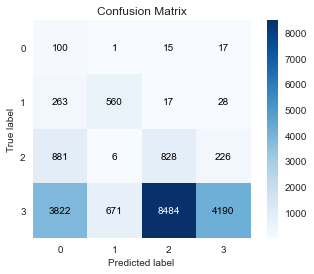

In [193]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(test_label, pred)

In [194]:
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

           0       0.02      0.75      0.04       133
           1       0.45      0.65      0.53       868
           2       0.09      0.43      0.15      1941
           3       0.94      0.24      0.39     17167

    accuracy                           0.28     20109
   macro avg       0.37      0.52      0.28     20109
weighted avg       0.83      0.28      0.37     20109



In [178]:
import itertools
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Normalized confusion matrix


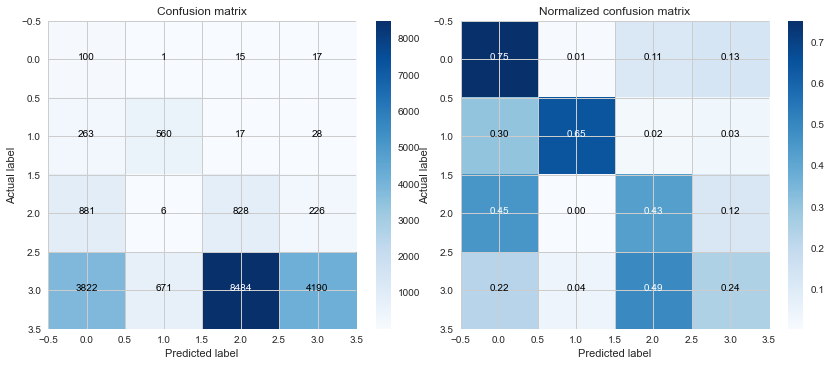

In [146]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, pred)
np.set_printoptions(precision=2)

from matplotlib import gridspec
fig = plt.figure(figsize=(12, 5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

#index = ['neutral','happy','sad','neutral1','happy1','sad1']  
##cm_df = pd.DataFrame(cm,columns,index)                      
#plt.figure(figsize=(10,6))  
#sns.heatmap(cm_df, annot=True)

## Plot non-normalized confusion matrix
plt.subplot(gs[0])
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(gs[1])
plot_confusion_matrix(cnf_matrix, normalize=True,title='Normalized confusion matrix')

plt.show()
fig.savefig('Confusion Matrix.png', bbox_inches="tight", dpi=300)